In [203]:
import numpy as np

In [204]:
nums = np.random.uniform(-10, 10, 100)

# nums = np.linspace(0,10,200)
# nums = np.concatenate((nums,np.linspace(50,100,100)))
nums = np.sort(nums)
nums

array([-9.94164327, -9.70094979, -9.38520872, -9.27474623, -9.2534485 ,
       -8.88661875, -8.86987872, -8.57940331, -8.02040052, -7.82843655,
       -7.80582201, -7.78548547, -7.76700138, -7.74605306, -7.56421565,
       -7.34628084, -7.2904726 , -7.14832814, -7.076141  , -6.88288118,
       -6.59632251, -6.58360629, -6.40011642, -5.29973935, -4.96078461,
       -4.69063963, -3.1248714 , -3.11399156, -2.69089277, -2.38061701,
       -2.28055657, -2.04554324, -1.97653435, -1.88962372, -1.44456128,
       -1.2582383 , -1.11783426, -0.35330592, -0.1222823 ,  0.0120017 ,
        0.27331331,  0.40912631,  0.6895397 ,  1.1290137 ,  1.32307914,
        1.34214649,  1.35012136,  1.75520187,  1.7786119 ,  1.83032019,
        1.96715045,  2.03003932,  2.64593082,  2.69034725,  2.75766334,
        2.79593392,  3.25217103,  3.77645051,  4.09079501,  4.1203487 ,
        4.32458639,  4.58671763,  4.94724922,  5.25591419,  5.37541992,
        5.39338966,  5.42598123,  5.43871258,  5.44473996,  5.52

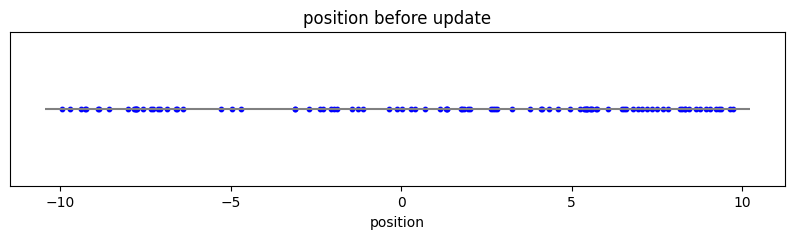

In [205]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums, np.ones_like(nums), color='b', s=10)

plt.title('position before update')
plt.xlabel('position')
plt.yticks([])
plt.show()

In [206]:
# from scipy.stats import norm
# 
# dens = []
# 
# for num in nums:
#     sum_p = 0
#     # 여기에 가우시안 넣어야 될듯
#     for num2 in nums:
#         if num != num2:
#             # gaussian 커널로 점들간 거리에 따라 확률추정
#             p = norm.pdf(num-num2, 0, 1)
#             # 점 num에서 확률추정
#             sum_p += p
# 
#     dens.append(sum_p / (len(nums)-1))
# 
# dens /= np.sum(dens)
#   
# plt.xlim([min_num-0.5, max_num+0.5])
# # plt.scatter(nums, dens, s=1)
# plt.plot(nums, dens)

이제 점을 옮겨야지
옮기려ㅈ면 기준 점에서 나머지 점들을 빼서 벡터를 만들고
그 벡터를 모드 더하면 어떻게든 하나의 방향이 나올거야
그 방향의 반대 방향으로 이동시키면

In [207]:
# from scipy.stats import norm
# import numpy as np
# 
# dens = np.zeros(len(nums))
# vec = np.zeros(len(nums))
# 
# enp = [float('inf')]
# 
# count = 0
# 
# while True:
#     for i in range(len(nums)):
#         sum_pdf = 0
#         vec_total = 0
# 
#         for num2 in nums:
#             if nums[i] != num2:
#                 # 가우시안 커널 계산
#                 p = norm.pdf(nums[i] - num2, 0, 1)
#                 sum_pdf += p
#                 vec_total += p * (nums[i] - num2)
# 
#         # 각 점에서의 밀도 계산, 정규화
#         dens[i] = sum_pdf / (len(nums) * (len(nums) -1))
#         vec[i] = vec_total
# 
#     
#     # 엔트로피 계산: 로그 합산을 통해 엔트로피를 직접 계산
#     current_entropy = np.sum(np.log(np.sum(dens) + 1e-10))  # 로그 계산 시 0 방지
# 
#     enp.append(current_entropy)
# 
#     # 엔트로피 변화가 epsilon 이하일 때 중지
#     if abs(enp[-2] - current_entropy) < 0.001 and current_entropy == min(enp):
#         break
# 
#     nums += 0.9 * vec  # vec의 크기 조절
#     count += 1


In [208]:
from scipy.stats import norm
import numpy as np

# 가우시안 커널 함수
def gaussian_kernel(x, sigma=1):
    return np.exp(-0.5 * (x / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

enp = [float('inf')]

while True:
    # 차이 행렬 계산: nums[i] - nums[j]의 모든 조합을 벡터화하여 계산
    diff_matrix = nums[:, np.newaxis] - nums[np.newaxis, :]
    np.fill_diagonal(diff_matrix, 0)  # 자기 자신과의 차이는 0으로 설정

    # 가우시안 커널 밀도 계산
    pdf_matrix = gaussian_kernel(diff_matrix)
    pdf_matrix[np.isnan(pdf_matrix)] = 0  # NaN 값 제거

    # 각 점에서의 밀도 및 벡터 업데이트 계산
    dens = np.sum(pdf_matrix, axis=1) / (len(nums) * (len(nums) - 1))
    vec = np.sum(pdf_matrix * diff_matrix, axis=1)

    # 엔트로피 계산
    current_entropy = -np.sum(dens * np.log(dens + 1e-10))  # 확률분포로 정규화한 후 로그 엔트로피 계산

    enp.append(current_entropy)

    # 엔트로피 변화가 epsilon 이하일 때 중지
    if abs(enp[-2] - current_entropy) < 1e-6 and current_entropy == min(enp):
        break

    nums += 0.9 * vec  # vec의 크기 조절

7678


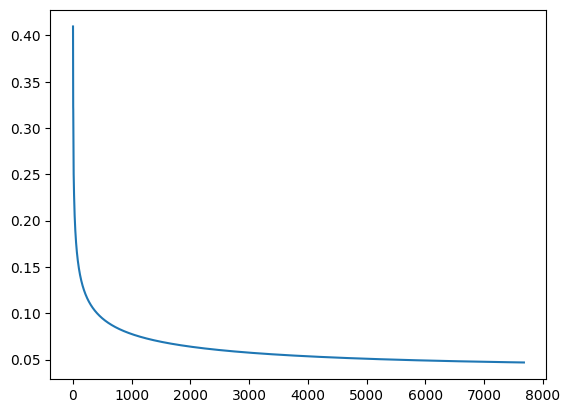

In [209]:
enp

# plt.xlim(0, 200)
plt.plot(enp)
print(len(enp))

In [210]:
## 지금 dens랑 num이랑 sort할 때 대응하여 정렬
nums_sorted = np.sort(nums)
index = np.argsort(nums)

dens_sorted = [dens[i] for i in index]

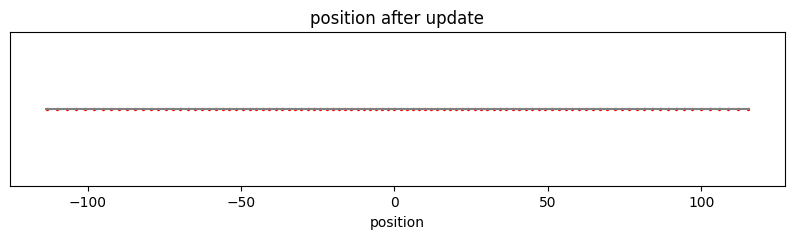

In [211]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(nums)
max_num = np.max(nums)

# 1차원 선 그리기
plt.figure(figsize=(10, 2))
plt.hlines(1, min_num-0.5, max_num+0.5, colors='gray', linestyles='solid')

# nums 값들을 선 위에 점으로 시각화
plt.scatter(nums_sorted, np.ones_like(nums), color='r', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.yticks([])
plt.show()

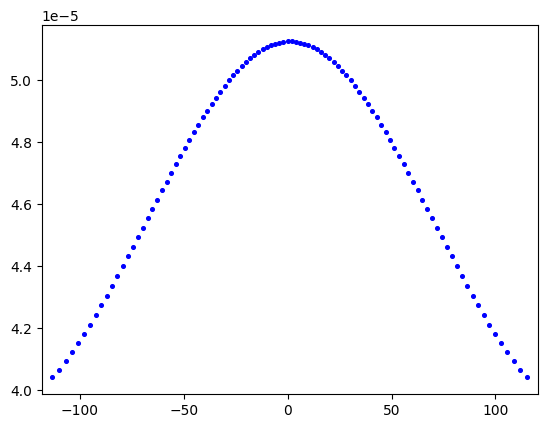

In [212]:
plt.xlim([min_num-5, max_num+5])
# plt.ylim([0, 0.05])
# plt.scatter(nums, dens, s=1)
# plt.plot(nums_sorted, dens_sorted)
plt.scatter(nums, dens, color='b', s=7)